In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns
from datetime import datetime
import yfinance as yf
yf.pdr_override()

c:\Users\cptfr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tickers = ["PETR4.SA", 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA']
# Baixando os dados dos tickers
carteira = yf.download(tickers, start="2002-01-01",end="2023-12-31")['Adj Close']
# Baixando os dados do índice Ibovespa
ibov = yf.download('^BVSP', start="2002-01-01", end="2023-12-31")['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
carteira.ffill(inplace=True)
carteira.bfill(inplace=True)
carteira

,BBAS3.SA,BBDC3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,,,
2002-01-01,0.263994,1.026872,1.617727,1.571675,1.896705
2002-01-02,0.268730,1.026872,1.691357,1.574747,1.860231
2002-01-03,0.272968,1.034691,1.672879,1.585502,1.889410
2002-01-04,0.266736,1.030782,1.645396,1.575669,1.929533
2002-01-07,0.260753,1.034691,1.627102,1.610083,1.929533
...,...,...,...,...,...
2023-12-21,26.554211,14.914569,31.443794,33.934216,73.674408
2023-12-22,26.627575,14.951638,31.942444,34.260597,73.119240
2023-12-26,26.872135,15.011247,32.268490,34.810783,73.377686


In [4]:
# Caminho do arquivo JSON com os dados da taxa Selic
caminho_do_arquivo = r'C:\Users\cptfr\Desktop\TCC_B3_OPCOES\dadosselicdiario.json'

# Lendo o arquivo JSON e transformando em DataFrame para manipulação de dados
selic = pd.read_json(caminho_do_arquivo)

# Converte a coluna 'data' do formato string para datetime, facilitando manipulações de data
selic['data'] = pd.to_datetime(selic['data'], format='%d/%m/%Y')

# Renomeia a coluna 'data' para 'Date' para padronização em inglês
selic.rename(columns={'data':'Date'}, inplace=True)

# Define a coluna 'Date' como índice do DataFrame, otimizando buscas e filtragens por data
selic.set_index('Date', inplace=True)

# Cria um novo DataFrame chamado 'selic_valores' contendo apenas a coluna 'valor', agora renomeada para 'SELIC'
selic_valores = pd.DataFrame(selic['valor']).rename(columns={'valor':'SELIC'})
selic_valores.index = pd.to_datetime(selic_valores.index)
selic_valores

,SELIC
Date,
2002-01-02,0.069220
2002-01-03,0.069220
2002-01-04,0.069220
2002-01-07,0.069220
2002-01-08,0.069220
...,...
2023-12-22,0.043739
2023-12-26,0.043739
2023-12-27,0.043739


In [5]:
# Caminho do arquivo JSON com os dados Retornos Direcionais
caminho_do_arquivo = r'C:\Users\cptfr\Desktop\TCC_B3_OPCOES\carteiras+estrategias\retornos_direcionais_op.json'

# Lendo o arquivo JSON e transformando em DataFrame para manipulação de dados
retornos_direcionais = pd.read_json(caminho_do_arquivo)
retornos_direcionais.index.name = 'Date'
retornos_direcionais.index = pd.to_datetime(retornos_direcionais.index, format='%Y%m%d')
retornos_direcionais

,OP_PETR,OP_VALE,OP_ITUB,OP_BBAS,OP_BBDC
Date,,,,,
2002-01-01,NaN,NaN,NaN,NaN,NaN
2002-01-02,0.0,0.0,0.0,0.0,0.0
2002-01-03,0.0,0.0,0.0,0.0,0.0
2002-01-04,0.0,0.0,0.0,0.0,0.0
2002-01-07,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2023-12-21,0.0,0.0,0.0,0.0,0.0
2023-12-22,0.0,0.0,0.0,0.0,0.0
2023-12-26,0.0,0.0,0.0,0.0,0.0


In [6]:
carteira = carteira.pct_change()
df_combinado_outer = retornos_direcionais.join(carteira, how='outer')
df_combinado_outer

,OP_PETR,OP_VALE,OP_ITUB,OP_BBAS,OP_BBDC,BBAS3.SA,BBDC3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,,,,,,,,
2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02,0.0,0.0,0.0,0.0,0.0,0.017940,0.000000,0.045514,0.001955,-0.019231
2002-01-03,0.0,0.0,0.0,0.0,0.0,0.015770,0.007614,-0.010925,0.006830,0.015686
2002-01-04,0.0,0.0,0.0,0.0,0.0,-0.022831,-0.003778,-0.016428,-0.006202,0.021235
2002-01-07,0.0,0.0,0.0,0.0,0.0,-0.022430,0.003792,-0.011118,0.021841,0.000000
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,0.0,0.0,0.0,0.0,0.0,0.001476,-0.000646,0.006755,0.000275,0.033293
2023-12-22,0.0,0.0,0.0,0.0,0.0,0.002763,0.002485,0.015858,0.009618,-0.007535
2023-12-26,0.0,0.0,0.0,0.0,0.0,0.009184,0.003987,0.010207,0.016059,0.003535


In [7]:
df_combinado_outer = df_combinado_outer.join(selic_valores, how='left')
df_combinado_outer

,OP_PETR,OP_VALE,OP_ITUB,OP_BBAS,OP_BBDC,BBAS3.SA,BBDC3.SA,ITUB4.SA,PETR4.SA,VALE3.SA,SELIC
Date,,,,,,,,,,,
2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02,0.0,0.0,0.0,0.0,0.0,0.017940,0.000000,0.045514,0.001955,-0.019231,0.069220
2002-01-03,0.0,0.0,0.0,0.0,0.0,0.015770,0.007614,-0.010925,0.006830,0.015686,0.069220
2002-01-04,0.0,0.0,0.0,0.0,0.0,-0.022831,-0.003778,-0.016428,-0.006202,0.021235,0.069220
2002-01-07,0.0,0.0,0.0,0.0,0.0,-0.022430,0.003792,-0.011118,0.021841,0.000000,0.069220
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,0.0,0.0,0.0,0.0,0.0,0.001476,-0.000646,0.006755,0.000275,0.033293,0.043739
2023-12-22,0.0,0.0,0.0,0.0,0.0,0.002763,0.002485,0.015858,0.009618,-0.007535,0.043739
2023-12-26,0.0,0.0,0.0,0.0,0.0,0.009184,0.003987,0.010207,0.016059,0.003535,0.043739


In [8]:
def preencher_nans(df):
    # Preenche NaNs com o valor anterior (forward fill)
    df.ffill(inplace=True)
    # Para os casos onde o primeiro valor é NaN, preenche com o valor seguinte (backward fill)
    df.bfill(inplace=True)
    return df

In [9]:
carteiras_normalizadas = {}  # Dicionário para armazenar as carteiras de cada ano
valor_selic = 20000 
valor_acoes = 5000
valor_opcoes = 1000

In [10]:
acoes_lista = ['BBAS3.SA','BBDC3.SA','ITUB4.SA','PETR4.SA','VALE3.SA']
opcoes_lista = ['OP_PETR','OP_VALE','OP_ITUB','OP_BBAS','OP_BBDC']
for ano in range(2002, 2024):
    # Filtrar dados do ano atual e preencher NaNs
    carteira_ano = preencher_nans(df_combinado_outer[f'{ano}-01-01':f'{ano}-12-31'].copy())
    # Se for o primeiro ano, normalizar com base no primeiro valor
    carteira_normalizada = pd.DataFrame(index=carteira_ano.index,columns=['SELIC','BBAS3.SA','BBDC3.SA',
                                                                          'ITUB4.SA','PETR4.SA','VALE3.SA','OP_PETR','OP_VALE','OP_ITUB','OP_BBAS','OP_BBDC','SomaAcoes','Saldo'])
    if ano == 2002:
        carteira_normalizada['SELIC'].iloc[0] = valor_selic
        for coluna in carteira_ano.columns:
            if coluna == 'SELIC':
                for i in range(1,len(carteira_ano)):
                    carteira_normalizada[coluna].iloc[i] = (carteira_normalizada[coluna].iloc[i-1] * (carteira_ano[coluna].iloc[i]/100)) + carteira_normalizada[coluna].iloc[i-1]
            elif coluna in acoes_lista:
                carteira_normalizada[coluna].iloc[0] = valor_acoes
                for i in range(1,len(carteira_ano)):
                    carteira_normalizada[coluna].iloc[i] = (carteira_normalizada[coluna].iloc[i-1] * (carteira_ano[coluna].iloc[i])) + carteira_normalizada[coluna].iloc[i-1]
            elif coluna in opcoes_lista:
                carteira_normalizada[coluna].iloc[0] = valor_opcoes
                for i in range(1,len(carteira_ano)):
                    carteira_normalizada[coluna].iloc[i] = (carteira_normalizada[coluna].iloc[i-1] * (carteira_ano[coluna].iloc[i])) + carteira_normalizada[coluna].iloc[i-1]

        carteira_normalizada['SomaAcoes'] = carteira_normalizada.loc[:,['BBAS3.SA','BBDC3.SA','ITUB4.SA','PETR4.SA','VALE3.SA','OP_PETR','OP_VALE','OP_ITUB','OP_BBAS','OP_BBDC']].sum(axis=1)
        carteira_normalizada['Saldo'] = carteira_normalizada.loc[:,['SomaAcoes','SELIC']].sum(axis=1)
        saldo_final = carteira_normalizada.iloc[-1]['Saldo']
        print(carteira_normalizada)
    else:
        carteira_normalizada['SELIC'].iloc[0] = saldo_final * 0.4
        for coluna in carteira_ano.columns:
            if coluna == 'SELIC':
                for i in range(1,len(carteira_ano)):
                    carteira_normalizada[coluna].iloc[i] = (carteira_normalizada[coluna].iloc[i-1] * (carteira_ano[coluna].iloc[i]/100)) + carteira_normalizada[coluna].iloc[i-1]
            elif coluna in acoes_lista:
                carteira_normalizada[coluna].iloc[0] = (saldo_final * 0.6)/6
                for i in range(1,len(carteira_ano)):
                    carteira_normalizada[coluna].iloc[i] = (carteira_normalizada[coluna].iloc[i-1] * (carteira_ano[coluna].iloc[i])) + carteira_normalizada[coluna].iloc[i-1]
            elif coluna in opcoes_lista: 
                carteira_normalizada[coluna].iloc[0] = (((saldo_final * 0.6)/6)/5)
                for i in range(1,len(carteira_ano)):
                    carteira_normalizada[coluna].iloc[i] = (carteira_normalizada[coluna].iloc[i-1] * (carteira_ano[coluna].iloc[i])) + carteira_normalizada[coluna].iloc[i-1]
        carteira_normalizada['SomaAcoes'] = carteira_normalizada.loc[:,['BBAS3.SA','BBDC3.SA','ITUB4.SA','PETR4.SA','VALE3.SA','OP_PETR','OP_VALE','OP_ITUB','OP_BBAS','OP_BBDC']].sum(axis=1)
        carteira_normalizada['Saldo'] = carteira_normalizada.loc[:,['SomaAcoes','SELIC']].sum(axis=1)
        saldo_final = carteira_normalizada.iloc[-1]['Saldo']
    carteiras_normalizadas[ano] = carteira_normalizada
print(carteiras_normalizadas)
carteira_total = pd.concat(carteiras_normalizadas.values())

                   SELIC     BBAS3.SA     BBDC3.SA     ITUB4.SA     PETR4.SA  \
Date                                                                           
2002-01-01         20000         5000         5000         5000         5000   
2002-01-02     20013.844  5089.701341       5000.0  5227.571923  5009.773468   
2002-01-03  20027.697583  5169.968457  5038.068713  5170.461559  5043.988382   
2002-01-04  20041.560755  5051.932831  5019.035227  5085.519089  5012.706533   
2002-01-07  20055.433523  4938.618833  5038.068713  5028.976133  5122.189782   
...                  ...          ...          ...          ...          ...   
2002-12-25  23870.217917  4645.891709  4276.650044  4829.818461  4766.371972   
2002-12-26  23891.288158  4627.004632  4225.888954  4774.415111  4682.307478   
2002-12-27  23912.376998  4579.789478  4568.526818  4794.304608    4560.1158   
2002-12-30  23933.484453  4627.004632  4854.062774  4872.436706  4535.680043   
2002-12-31   23954.61054  4627.004632  4

<AxesSubplot:xlabel='Date'>

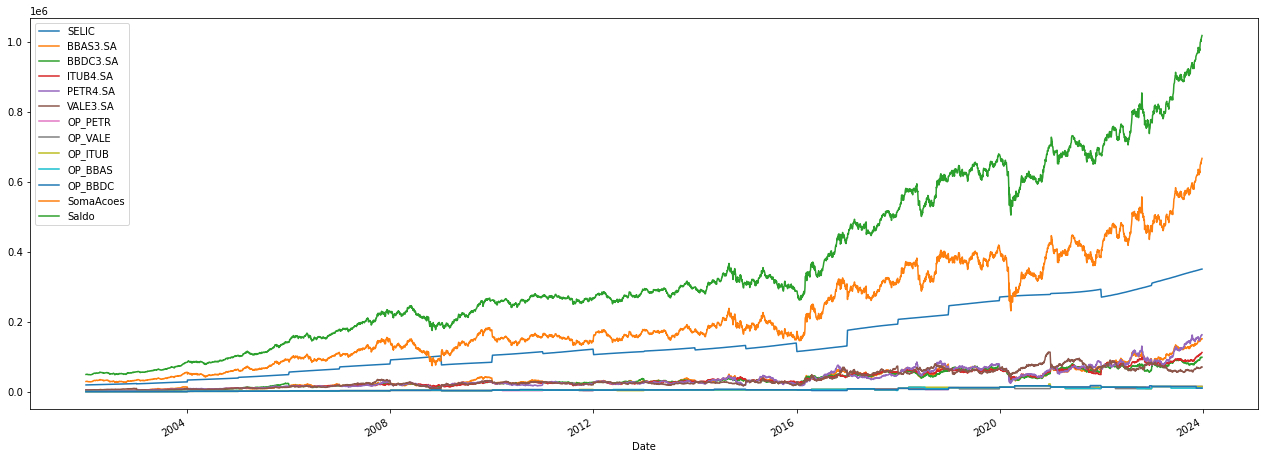

In [11]:
carteira_total.plot(figsize=(22,8))

In [12]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2002-01-02     50000.000000
2002-01-03     51416.522491
2002-01-04     51658.016148
2002-01-07     51827.422145
2002-01-08     51066.897347
                  ...      
2023-12-21    476434.544406
2023-12-22    478492.647059
2023-12-26    481304.065744
2023-12-27    483686.562860
2023-12-28    483654.123414
Name: Adj Close, Length: 5447, dtype: float64

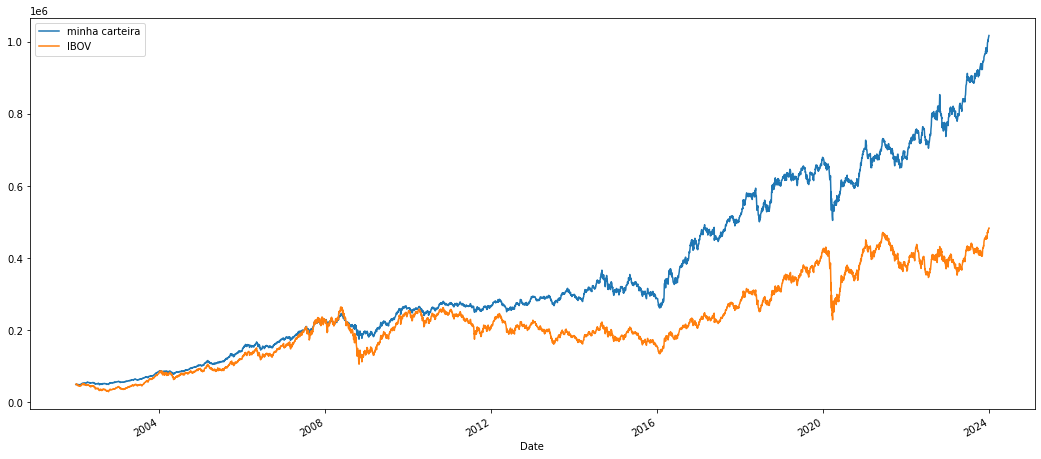

In [13]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado
carteira_total["Saldo"].plot(figsize=(18,8), label='minha carteira')
ibov_normalizado.plot(label="IBOV")
plt.legend()